In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "/Users/kang/Dropbox/Code/data/toppcell_test/"

In [7]:
df_bin = pd.read_csv(path + "test_bin_table.txt", sep = "\t", header = 0, index_col = 0).T
df_DEG = pd.read_csv(path + "DEGs_cell.txt", sep = "\t", header = 0, index_col = 0)

In [8]:
df_bin.shape

(35635, 209)

In [9]:
df_DEG.shape

(285080, 7)

In [11]:
df_bin.head()

,ctrl-B cells-bin-0,ctrl-B cells-bin-1,ctrl-B cells-bin-10,ctrl-B cells-bin-11,ctrl-B cells-bin-12,ctrl-B cells-bin-13,ctrl-B cells-bin-2,ctrl-B cells-bin-3,ctrl-B cells-bin-4,ctrl-B cells-bin-5,...,stim-NK cells-bin-11,stim-NK cells-bin-12,stim-NK cells-bin-2,stim-NK cells-bin-3,stim-NK cells-bin-4,stim-NK cells-bin-5,stim-NK cells-bin-6,stim-NK cells-bin-7,stim-NK cells-bin-8,stim-NK cells-bin-9
MIR1302-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM138A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OR4F5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RP11-34P13.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RP11-34P13.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_DEG.head()

,Status,scores,logfoldchanges,pvals,pvals_adj,pts,pts_rest
names,,,,,,,
CD74,B cells,51.954353,12.832310,0.000000e+00,0.000000e+00,0.990284,0.526109
CD79A,B cells,45.080624,7.622758,0.000000e+00,0.000000e+00,0.690245,0.012670
RPL18A,B cells,32.703323,5.058470,3.407655e-201,6.132919e-199,0.996891,0.947783
MS4A1,B cells,32.226830,7.371540,9.420891e-192,1.568754e-189,0.456277,0.005158
CD37,B cells,32.126408,2.349647,1.389609e-192,2.335789e-190,0.650991,0.296561


In [12]:
np.unique(df_DEG["Status"])

array(['B cells', 'CD14+ Monocytes', 'CD4 T cells', 'CD8 T cells',
       'Dendritic cells', 'FCGR3A+ Monocytes', 'Megakaryocytes',
       'NK cells'], dtype=object)

In [40]:
df_subsetDEG = df_DEG.groupby(["Status"]).head(200)
df_subsetDEG = df_subsetDEG.sort_values(["Status", "pts"], ascending = [True, False])
df_subsetDEG.head()

,Status,scores,logfoldchanges,pvals,pvals_adj,pts,pts_rest
names,,,,,,,
RPS2,B cells,14.517612,3.854995,2.892985e-46,1.433818e-44,0.998834,0.979231
RPL13,B cells,15.010753,3.275271,2.281952e-49,1.202919e-47,0.998445,0.975973
RPS19,B cells,19.119852,3.339483,2.424200e-77,1.861775e-75,0.998057,0.971765
RPL13A,B cells,22.112057,4.356974,5.021781e-101,4.772031e-99,0.997668,0.970317
RPL21,B cells,11.197254,1.897693,1.319291e-28,4.542311e-27,0.997668,0.970588


In [41]:
df_heatmap = df_bin.loc[list(df_subsetDEG.index.values),:]
df_heatmap.head()

,ctrl-B cells-bin-0,ctrl-B cells-bin-1,ctrl-B cells-bin-10,ctrl-B cells-bin-11,ctrl-B cells-bin-12,ctrl-B cells-bin-13,ctrl-B cells-bin-2,ctrl-B cells-bin-3,ctrl-B cells-bin-4,ctrl-B cells-bin-5,...,stim-NK cells-bin-11,stim-NK cells-bin-12,stim-NK cells-bin-2,stim-NK cells-bin-3,stim-NK cells-bin-4,stim-NK cells-bin-5,stim-NK cells-bin-6,stim-NK cells-bin-7,stim-NK cells-bin-8,stim-NK cells-bin-9
RPS2,31.478733,23.308510,9.967735,9.763434,8.440855,7.139780,20.531914,18.755322,17.180853,14.655905,...,3.365852,3.243901,5.650601,5.795181,4.337350,4.855422,4.120482,3.313254,3.518074,3.915663
RPL13,24.691488,19.829788,10.634402,9.591393,8.924726,8.021501,17.297874,17.521275,14.148941,12.860208,...,2.707315,2.621950,5.506023,4.506024,4.493976,4.554218,4.337351,3.867470,3.843374,3.795181
RPS19,20.329788,15.085112,8.494619,8.720425,7.311824,6.494620,12.691492,13.787238,11.851071,11.322574,...,3.207315,2.987804,6.385543,5.590362,5.120481,5.108433,4.192771,3.771084,3.879519,3.879518
RPL13A,23.276596,17.595745,9.559134,9.645156,7.301071,6.763437,17.255318,16.957447,14.212771,12.526874,...,2.780487,2.536585,4.795181,4.481928,4.108434,4.240964,3.168675,3.096386,3.289158,3.180724
RPL21,19.053194,14.829788,7.870963,7.688168,7.150533,6.365588,13.723409,12.010640,11.042557,10.763435,...,4.109754,3.939022,6.120481,5.855422,5.361445,5.614459,4.722893,4.385542,4.481927,4.180723


<AxesSubplot:>

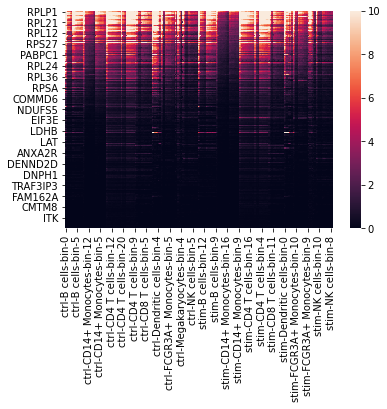

In [48]:
sns.heatmap(df_heatmap.iloc[200:400], vmin = 0, vmax = 10)